In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25 (from 1)
Receiving objects: 100% (39/39), 177.08 MiB | 11.36 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [2]:
# Check what files are in the PubMed_20K dataset
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [3]:

# Start by using the 20k dataset
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [4]:

# Check all of the filenames in the target directory
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

In [5]:
def get_lines(file):
  with open(file, "r") as f:
    return f.readlines()

In [6]:
train_lines=get_lines(filenames[0])
# test_lines=get_lines(filenames[1])
# val_lines=get_lines(filenames[2])

In [7]:
train_lines[:20]

['###24290286\n',
 'BACKGROUND\tIgE sensitization to Aspergillus fumigatus and a positive sputum fungal culture result are common in patients with refractory asthma .\n',
 'BACKGROUND\tIt is not clear whether these patients would benefit from antifungal treatment .\n',
 'OBJECTIVE\tWe sought to determine whether a @-month course of voriconazole improved asthma-related outcomes in patients with asthma who are IgE sensitized to A fumigatus .\n',
 'METHODS\tAsthmatic patients who were IgE sensitized to A fumigatus with a history of at least @ severe exacerbations in the previous @ months were treated for @ months with @ mg of voriconazole twice daily , followed by observation for @ months , in a double-blind , placebo-controlled , randomized design .\n',
 'METHODS\tPrimary outcomes were improvement in quality of life at the end of the treatment period and a reduction in the number of severe exacerbations over the @ months of the study .\n',
 'RESULTS\tSixty-five patients were randomized .

In [8]:
len(train_lines)

35212

In [9]:
def preproc_txt_with_line_no(file):
  lines=get_lines(file)
  abstract_lines=''
  abstract_lines_list=[]

  for line in lines:
    if line.startswith('###'):
      abstract_id=line
      abstract_lines=''
    elif line.isspace():  #checks if its \n char
      abstract_line_split=abstract_lines.splitlines()
      for abstract_line_number,abstract_line in enumerate(abstract_line_split):
        line_data={}
        target_text_split=abstract_line.split('\t')
        line_data['target']=target_text_split[0]
        line_data['text']=target_text_split[1].lower()
        line_data['line_number']=abstract_line_number
        line_data['total lines'] =len(abstract_line)-1


    else:
      abstract_lines+=line
  return abstract_lines_list

In [10]:
def preproc_txt_with_line_no(file):
    lines = get_lines(file)  # Function to read lines from a file
    abstract_lines_list = []
    abstract_lines = ""

    for line in lines:
        if line.startswith('###'):
            abstract_id = line  # Store the abstract ID but never used
            abstract_lines = ""  # Reset the abstract content
        elif line.isspace():  # Checks if it's a newline character
            abstract_line_split = abstract_lines.strip().splitlines()  # Split abstract into lines

            total_lines = len(abstract_line_split)  # Get total lines in the abstract

            for abstract_line_number, abstract_line in enumerate(abstract_line_split):
                target_text_split = abstract_line.split('\t')

                if len(target_text_split) < 2:
                    continue  # Skip lines without a tab character

                line_data = {
                    'target': target_text_split[0],
                    'text': target_text_split[1].lower(),
                    'line_number': abstract_line_number,
                    'total_lines': total_lines
                }
                abstract_lines_list.append(line_data)

            abstract_lines = ""  # Reset for next abstract
        else:
            abstract_lines += line  # Append line to abstract

    return abstract_lines_list


In [11]:
train_sample=preproc_txt_with_line_no(data_dir+'train.txt')
val_sample=preproc_txt_with_line_no(data_dir+'dev.txt')
test_sample=preproc_txt_with_line_no(data_dir+'test.txt')
len(train_sample),len(val_sample),len(test_sample)

(180040, 30212, 30135)

In [12]:
train_sample[0:10]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [13]:
import pandas as pd
train_df=pd.DataFrame(train_sample)
val_df=pd.DataFrame(val_sample)
test_df=pd.DataFrame(test_sample)

In [14]:
train_df.head(),val_df.head(),test_df.head()

(      target                                               text  line_number  \
 0  OBJECTIVE  to investigate the efficacy of @ weeks of dail...            0   
 1    METHODS  a total of @ patients with primary knee oa wer...            1   
 2    METHODS  outcome measures included pain reduction and i...            2   
 3    METHODS  pain was assessed using the visual analog pain...            3   
 4    METHODS  secondary outcome measures included the wester...            4   
 
    total_lines  
 0           12  
 1           12  
 2           12  
 3           12  
 4           12  ,
        target                                               text  line_number  \
 0  BACKGROUND  ige sensitization to aspergillus fumigatus and...            0   
 1  BACKGROUND  it is not clear whether these patients would b...            1   
 2   OBJECTIVE  we sought to determine whether a @-month cours...            2   
 3     METHODS  asthmatic patients who were ige sensitized to ...          

In [15]:
train_df.target.value_counts()

,count
target,
METHODS,59353
RESULTS,57953
CONCLUSIONS,27168
BACKGROUND,21727
OBJECTIVE,13839


<Axes: ylabel='Frequency'>

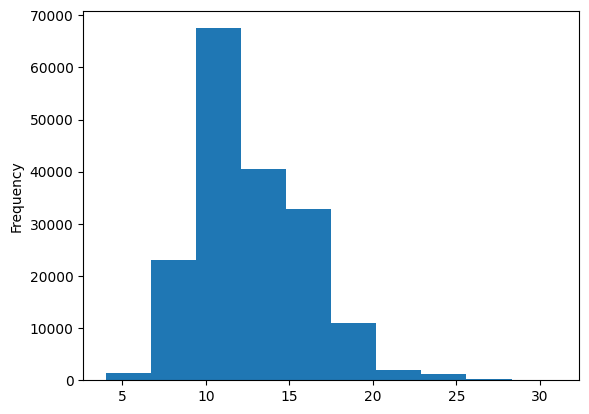

In [16]:
train_df.total_lines.plot.hist()

In [17]:
train_sent=train_df.text.tolist()
val_sent=val_df.text.tolist()
test_sent=test_df.text.tolist()
len(train_sent),len(val_sent),len(test_sent)

(180040, 30212, 30135)

In [18]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False)
train_labels_ohe=ohe.fit_transform(train_df[['target']])
val_labels_ohe=ohe.transform(val_df[['target']])
test_labels_ohe=ohe.transform(test_df[['target']])

In [19]:
print(train_labels_ohe.shape)  # Should be (180040, 5)
print(val_labels_ohe.shape)    # Should be (30212, 5)
print(test_labels_ohe.shape)

(180040, 5)
(30212, 5)
(30135, 5)


In [20]:
train_labels_ohe

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_labels_ohe=le.fit_transform(train_df['target'])
val_labels_ohe=le.transform(val_df['target'])
test_labels_ohe=le.transform(test_df['target'])

In [22]:
print(train_labels_ohe.shape)  # Should be (num_samples, num_classes)
print(val_labels_ohe.shape)    # Should match (num_samples, num_classes)
print(test_labels_ohe.shape)

(180040,)
(30212,)
(30135,)


In [23]:
train_labels_ohe

array([3, 2, 2, ..., 4, 1, 1])

In [24]:
num_cls=len(le.classes_)
cls_names=le.classes_
num_cls,cls_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


In [26]:
m0=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('clf',MultinomialNB())
])

m0.fit(train_sent,train_labels_ohe)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [27]:
m0.score(val_sent,val_labels_ohe)

0.7218323844829869

In [28]:
m0_pred=m0.predict(val_sent)
m0_pred

array([4, 1, 3, ..., 4, 4, 1])

In [29]:
val_labels_ohe

array([0, 0, 3, ..., 4, 1, 1])

In [30]:

# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2025-02-21 08:48:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-02-21 08:48:11 (92.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [31]:

# Import calculate_results helper function
from helper_functions import calculate_results

In [32]:
m0_res=calculate_results(val_labels_ohe,m0_pred)
m0_res

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers


In [34]:
train_sent[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [35]:
sent_len=[len(sent.split()) for sent in train_sent]
avg_sent_len=np.mean(sent_len)
avg_sent_len

26.338269273494777

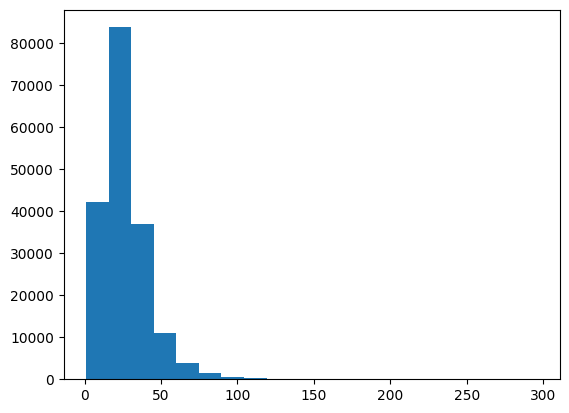

In [36]:
import matplotlib.pyplot as plt
plt.hist(sent_len,bins=20)
plt.show()

In [37]:
op_seq_len=int(np.percentile(sent_len,95))
op_seq_len

55

In [38]:
max_tokens=68000

In [39]:
from tensorflow.keras.layers import TextVectorization
text_vectorizer=TextVectorization(max_tokens=max_tokens,
                                   output_sequence_length=op_seq_len)

In [40]:
text_vectorizer.adapt(train_sent)

In [41]:
import random
target_sent=random.choice(train_sent)
print(target_sent)
print(len(target_sent.split()))
print(text_vectorizer([target_sent]))

prospective , randomized , placebo controlled , double blinded study .
11
tf.Tensor(
[[ 241   29   48  106 1380  587   17    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]], shape=(1, 55), dtype=int64)


In [42]:
rct_20k_txt_vocab=text_vectorizer.get_vocabulary()
len(rct_20k_txt_vocab),rct_20k_txt_vocab[:5],rct_20k_txt_vocab[-5:],

(64841,
 ['', '[UNK]', 'the', 'and', 'of'],
 ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp'])

In [43]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

In [44]:
token_embed=layers.Embedding(input_dim=len(rct_20k_txt_vocab),
                             output_dim=128,
                             mask_zero=True,
                             name='token_embedding')

In [45]:
print(target_sent)
token_sent=text_vectorizer([target_sent])
print(token_sent)
emb_sent=token_embed(token_sent)
print(emb_sent)
print(emb_sent.shape)

prospective , randomized , placebo controlled , double blinded study .
tf.Tensor(
[[ 241   29   48  106 1380  587   17    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]], shape=(1, 55), dtype=int64)
tf.Tensor(
[[[ 0.02705114  0.01838991  0.04974327 ... -0.01076322  0.0076144
   -0.03778235]
  [-0.01945306  0.01555313  0.01308953 ...  0.03588266  0.01592273
   -0.02436878]
  [-0.02656661  0.01817549 -0.03113649 ...  0.04651074  0.01500121
    0.03413681]
  ...
  [ 0.02899477 -0.00271212  0.02452605 ... -0.0313413  -0.03792477
   -0.03528839]
  [ 0.02899477 -0.00271212  0.02452605 ... -0.0313413  -0.03792477
   -0.03528839]
  [ 0.02899477 -0.00271212  0.02452605 ... -0.0313413  -0.03792477
   -0.03528839]]], shape=(1, 55, 128), dtype=float32)
(1, 55, 128)


In [46]:
# train_ds=tf.data.Dataset.from_tensor_slices((train_sent,train_labels_ohe))
# val_ds=tf.data.Dataset.from_tensor_slices((val_sent,val_labels_ohe))
# test_ds=tf.data.Dataset.from_tensor_slices((test_sent,test_labels_ohe))

In [47]:
print(train_labels_ohe.shape)  # Should be (num_samples, num_classes)
print(val_labels_ohe.shape)    # Should match (num_samples, num_classes)
print(test_labels_ohe.shape)

(180040,)
(30212,)
(30135,)


In [48]:
train_ds = tf.data.Dataset.from_tensor_slices((np.array(train_sent, dtype=object)[:, None], train_labels_ohe))
val_ds = tf.data.Dataset.from_tensor_slices((np.array(val_sent, dtype=object)[:, None], val_labels_ohe))
test_ds = tf.data.Dataset.from_tensor_slices((np.array(test_sent, dtype=object)[:, None], test_labels_ohe))


In [49]:
print(train_labels_ohe.shape)  # Should be (num_samples, num_classes)
print(val_labels_ohe.shape)    # Should match (num_samples, num_classes)
print(test_labels_ohe.shape)

(180040,)
(30212,)
(30135,)


In [50]:
val_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(1,), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [51]:
train_ds=train_ds.batch(32).prefetch(tf.data.AUTOTUNE)
val_ds=val_ds.batch(32).prefetch(tf.data.AUTOTUNE)
test_ds=test_ds.batch(32).prefetch(tf.data.AUTOTUNE)

In [52]:
input=layers.Input(shape=(1,),dtype=tf.string)
text_vector=text_vectorizer(input)
emb=token_embed(text_vector)
x=layers.Conv1D(64,kernel_size=5,padding='same',activation='relu')(emb)
x=layers.GlobalAveragePooling1D()(x)
output=layers.Dense(num_cls,activation='softmax')(x)
m1=tf.keras.Model(input,output,name='m1_cnn')

m1.compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [53]:
m1.summary()

Model: "m1_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization                   │ (None, 55)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ token_embedding (Embedding)          │ (None, 55, 128)             │       8,299,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 55, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,340,997 (31.82 MB)

 Trainable params: 8,340,997 (31.82 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
print(train_labels_ohe.shape)  # Should be (num_samples, num_classes)
print(val_labels_ohe.shape)    # Should match (num_samples, num_classes)
print(test_labels_ohe.shape)

(180040,)
(30212,)
(30135,)


In [55]:
import numpy as np

train_labels_ohe = np.array(train_labels_ohe, dtype=np.float32)
val_labels_ohe = np.array(val_labels_ohe, dtype=np.float32)
test_labels_ohe = np.array(test_labels_ohe, dtype=np.float32)

In [56]:
print(train_labels_ohe.shape)  # Should be (num_samples, num_classes)
print(val_labels_ohe.shape)    # Should match (num_samples, num_classes)
print(test_labels_ohe.shape)

(180040,)
(30212,)
(30135,)


In [57]:
m1_hist=m1.fit(train_ds,steps_per_epoch=int(0.1*len(train_ds)),epochs=3,validation_data=val_ds,validation_steps=int(0.1*len(val_ds)))

Epoch 1/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.5139 - loss: 1.1607 - val_accuracy: 0.7400 - val_loss: 0.6910
Epoch 2/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7467 - loss: 0.6813 - val_accuracy: 0.7736 - val_loss: 0.6336
Epoch 3/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7680 - loss: 0.6245 - val_accuracy: 0.7859 - val_loss: 0.6010


In [58]:
m1.evaluate(val_ds)

945/945 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7850 - loss: 0.5992


[0.6017858386039734, 0.7843903303146362]

In [59]:
m1_pred_prob=m1.predict(val_ds)
m1_pred_prob,m1_pred_prob.shape

945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


(array([[4.0560794e-01, 1.5912649e-01, 9.8363481e-02, 3.0299863e-01,
         3.3903386e-02],
        [4.9046677e-01, 2.2695208e-01, 9.9941958e-03, 2.6509139e-01,
         7.4955830e-03],
        [1.6474134e-01, 4.6519572e-03, 2.1313247e-03, 8.2844102e-01,
         3.4332235e-05],
        ...,
        [3.8689441e-06, 8.4134360e-04, 6.8668299e-04, 3.0944025e-06,
         9.9846506e-01],
        [4.7216192e-02, 4.3909988e-01, 8.9122035e-02, 4.6101134e-02,
         3.7846079e-01],
        [1.9629920e-01, 6.6502780e-01, 4.8328366e-02, 3.9010778e-02,
         5.1333889e-02]], dtype=float32),
 (30212, 5))

In [60]:
m1_pred=tf.argmax(m1_pred_prob,axis=1)
m1_pred

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [61]:
m1_res=calculate_results(val_labels_ohe,m1_pred)
m1_res

{'accuracy': 78.4390308486694,
 'precision': 0.781468974640628,
 'recall': 0.784390308486694,
 'f1': 0.7819316827619571}

In [62]:
m0_res

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [63]:

# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [64]:

# Test out the embedding on a random sentence
random_training_sentence = random.choice(train_sent)
print(f"Random training sentence:\n{random_training_sentence}\n")
use_embedded_sentence = tf_hub_embedding_layer([random_training_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence[0][:30]} (truncated output)...\n")
print(f"Length of sentence embedding:\n{len(use_embedded_sentence[0])}")

Random training sentence:
typical treatments for hospitalised patients with mental illness are not enough to prevent suicide .

Sentence after embedding:
[-0.04645544 -0.03690805  0.06322432 -0.0277459   0.03551763 -0.07773255
  0.06017896 -0.00769316 -0.07045132 -0.0588956   0.08867122 -0.07732205
 -0.058494    0.04819667  0.05458665 -0.0861932  -0.08867715  0.00495037
 -0.07780493  0.01562059 -0.06205182  0.00673073  0.06567811 -0.07664287
  0.00159857 -0.03294282  0.00908373 -0.00963882 -0.00270264  0.0148436 ] (truncated output)...

Length of sentence embedding:
512


In [65]:
import os
os.environ["TF_XLA_FLAGS"] = "--tf_xla_auto_jit=0"
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Layer, Input,Dense
from tensorflow.keras.models import Model

# Define a custom layer for the Universal Sentence Encoder
class USELayer(Layer):
    def __init__(self, **kwargs):
        super(USELayer, self).__init__(**kwargs)
        self.use_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        dtype=tf.string, trainable=False)

    def call(self, inputs):
        return self.use_layer(inputs)

# Define model
input_text = Input(shape=(), dtype=tf.string, name="input_text")
embedding = USELayer()(input_text)  # Use the custom layer
dense = Dense(128, activation='relu')(embedding)  # Trainable layer
output = Dense(1, activation='sigmoid')(dense)

m2 = Model(inputs=input_text, outputs=embedding)


# Compile the model
m2.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])




In [66]:
m2.fit(train_ds,epochs=3,validation_data=val_ds)

Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


InvalidArgumentError: Graph execution error:

Detected at node data defined at (most recent call last):
<stack traces unavailable>
Detected at node data defined at (most recent call last):
<stack traces unavailable>
Detected unsupported operations when trying to compile graph __inference_one_step_on_data_37423[] on XLA_GPU_JIT: _Arg (No registered '_Arg' OpKernel for XLA_GPU_JIT devices compatible with node {{node data}}
	 (OpKernel was found, but attributes didn't match) Requested Attributes: T=DT_STRING, _output_shapes=[[32,1]], _user_specified_name="data", index=0){{node data}}
The op is created at: 
File "<frozen runpy>", line 198, in _run_module_as_main
File "<frozen runpy>", line 88, in _run_code
File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start
File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever
File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once
File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request
File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute
File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
File "<ipython-input-66-ea9301cff45f>", line 1, in <cell line: 0>
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator
File "/usr/local/lib/python3.11/dist-packages/tensorflow/core/function/polymorphism/function_type.py", line 356, in placeholder_arguments
File "/usr/local/lib/python3.11/dist-packages/tensorflow/core/function/trace_type/default_types.py", line 250, in placeholder_value
File "/usr/local/lib/python3.11/dist-packages/tensorflow/core/function/trace_type/default_types.py", line 251, in <listcomp>
	tf2xla conversion failed while converting __inference_one_step_on_data_37423[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_multi_step_on_iterator_37796]

In [67]:
train_sent[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

In [68]:
def split_char(txt):
  return " ".join(list(txt))

In [69]:
split_char(random_training_sentence)

't y p i c a l   t r e a t m e n t s   f o r   h o s p i t a l i s e d   p a t i e n t s   w i t h   m e n t a l   i l l n e s s   a r e   n o t   e n o u g h   t o   p r e v e n t   s u i c i d e   .'

In [70]:
train_char=[split_char(sent) for sent in train_sent]
val_char=[split_char(sent) for sent in val_sent]
test_char=[split_char(sent) for sent in test_sent]
train_char[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [71]:
char_lens=[len(sent) for sent in train_char]
mean_char_len=np.mean(char_lens)
mean_char_len

297.7325149966674

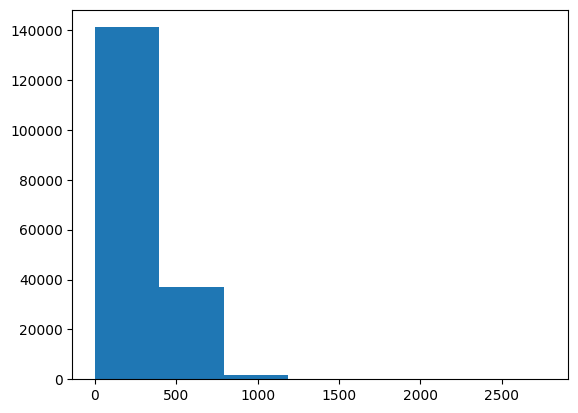

In [72]:
import matplotlib.pyplot as plt
plt.hist(char_lens,bins=7)
plt.show()

In [73]:
op_seq_char_len=int(np.percentile(char_lens,95))
op_seq_char_len

579

In [74]:
import string
alphabet=string.ascii_lowercase+string.digits+string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [75]:
num_char_tkn=len(alphabet)+2
char_vect=TextVectorization(max_tokens=num_char_tkn,
                            output_sequence_length=op_seq_char_len,
                            standardize='lower_and_strip_punctuation')

In [76]:
char_vect.adapt(train_char)

In [77]:
char_vocab=char_vect.get_vocabulary()
print(len(char_vocab))
print(char_vocab[:5])
print(char_vocab[-5:])

28
['', '[UNK]', 'e', 't', 'i']
['k', 'x', 'z', 'q', 'j']


In [78]:
rand_train_chars=random.choice(train_char)
print(rand_train_chars)
print(len(rand_train_chars))
print(char_vect([rand_train_chars]))

t a s k   p e r f o r m a n c e   d e c r e a s e d   a s   p a t i e n t   l o a d   i n c r e a s e d   .
107
tf.Tensor(
[[ 3  5  9 23 14  2  8 17  7  8 15  5  6 11  2 10  2 11  8  2  5  9  2 10
   5  9 14  5  3  4  2  6  3 12  7  5 10  4  6 11  8  2  5  9  2 10  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

In [79]:
char_embed=layers.Embedding(input_dim=len(char_vocab),
                             output_dim=25,
                             mask_zero=True,
                             name='char_embedding')

In [80]:
print(rand_train_chars)
char_emb_ex=char_embed(char_vect([rand_train_chars]))
print(char_emb_ex)
print(char_emb_ex.shape)

t a s k   p e r f o r m a n c e   d e c r e a s e d   a s   p a t i e n t   l o a d   i n c r e a s e d   .
tf.Tensor(
[[[-0.02527516  0.01232722 -0.01718075 ... -0.04435245 -0.03476993
   -0.04238847]
  [ 0.01531709  0.03656903 -0.01388677 ... -0.03414395  0.04538599
    0.0489257 ]
  [ 0.03458441 -0.0288134  -0.03740869 ... -0.02628562 -0.01502442
   -0.01467658]
  ...
  [ 0.00879939 -0.03923389 -0.02806762 ...  0.00900278  0.03135768
   -0.03057128]
  [ 0.00879939 -0.03923389 -0.02806762 ...  0.00900278  0.03135768
   -0.03057128]
  [ 0.00879939 -0.03923389 -0.02806762 ...  0.00900278  0.03135768
   -0.03057128]]], shape=(1, 579, 25), dtype=float32)
(1, 579, 25)


In [81]:
len(rand_train_chars  )

107

In [82]:
input=tf.keras.Input(shape=(1,),dtype=tf.string)
char_vector=char_vect(input)
char_emb=char_embed(char_vector)
x=layers.Conv1D(64,kernel_size=5,padding='same',activation='relu')(char_emb)
x=layers.GlobalMaxPooling1D()(x)
ops=layers.Dense(num_cls,activation='softmax')(x)
m3=tf.keras.Model(input,ops,name='m3_cnn')

m3.compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'conv1d_1' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [83]:
train_char_ds=tf.data.Dataset.from_tensor_slices((np.array(train_char,dtype=object)[:,None],train_labels_ohe)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_ds=tf.data.Dataset.from_tensor_slices((np.array(val_char,dtype=object)[:,None],val_labels_ohe)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_ds=tf.data.Dataset.from_tensor_slices((np.array(test_char,dtype=object)[:,None],test_labels_ohe)).batch(32).prefetch(tf.data.AUTOTUNE)

In [84]:
m3_hist=m3.fit(train_char_ds,epochs=3,validation_data=val_char_ds)

Epoch 1/3
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 51s 9ms/step - accuracy: 0.5845 - loss: 1.0370 - val_accuracy: 0.6895 - val_loss: 0.7928
Epoch 2/3
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 48s 9ms/step - accuracy: 0.7130 - loss: 0.7596 - val_accuracy: 0.7172 - val_loss: 0.7357
Epoch 3/3
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 72s 7ms/step - accuracy: 0.7305 - loss: 0.7198 - val_accuracy: 0.7284 - val_loss: 0.7126


In [85]:
m3_pred_prob=m3.predict(val_char_ds)
m3_pred_prob

945/945 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


array([[1.2681985e-01, 5.7876980e-01, 6.2417205e-02, 1.8670249e-01,
        4.5290634e-02],
       [7.4480824e-02, 8.9109409e-01, 8.3996705e-04, 1.3144779e-02,
        2.0440400e-02],
       [4.0846619e-01, 5.4163642e-02, 1.8806437e-02, 5.1143962e-01,
        7.1241790e-03],
       ...,
       [2.0578536e-03, 1.0733935e-02, 1.8034305e-02, 5.8044755e-04,
        9.6859342e-01],
       [1.8219473e-02, 3.3552226e-01, 3.5742637e-02, 8.4938481e-03,
        6.0202181e-01],
       [7.9394817e-02, 8.5205686e-01, 3.5567027e-02, 6.5893666e-03,
        2.6391953e-02]], dtype=float32)

In [86]:
m3_pred=tf.argmax(m3_pred_prob,axis=1)
m3_pred

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 4, 1])>

In [87]:
m3_res=calculate_results(val_labels_ohe,m3_pred)
m3_res

{'accuracy': 72.84191711902555,
 'precision': 0.7284769815937701,
 'recall': 0.7284191711902556,
 'f1': 0.7231724607162571}

In [88]:
m0_res

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [89]:
train_df['line_number'].value_counts()

,count
line_number,
0,15000
1,15000
2,15000
3,15000
4,14992
5,14949
6,14758
7,14279
8,13346


<Axes: ylabel='Frequency'>

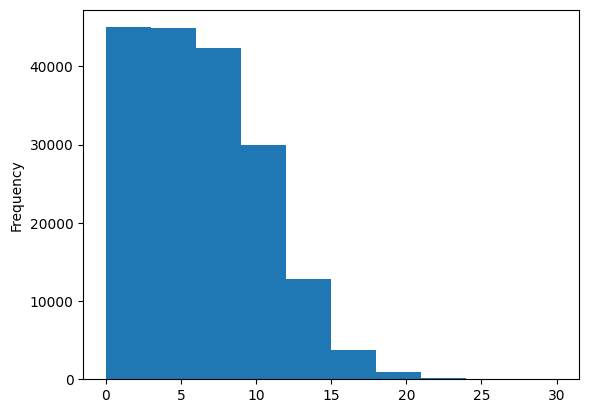

In [90]:
train_df.line_number.plot.hist()

In [93]:
train_line_no_oh=tf.one_hot(train_df[['line_number']].to_numpy(),depth=15)
val_line_no_oh=tf.one_hot(val_df[['line_number']].to_numpy(),depth=15)
test_line_no_oh=tf.one_hot(test_df[['line_number']].to_numpy(),depth=15)

In [94]:
train_df['total_lines'].value_counts()

,count
total_lines,
12,24468
11,23639
13,22113
10,19400
14,18438
15,14610
9,12285
16,10768
8,7464


<Axes: ylabel='Frequency'>

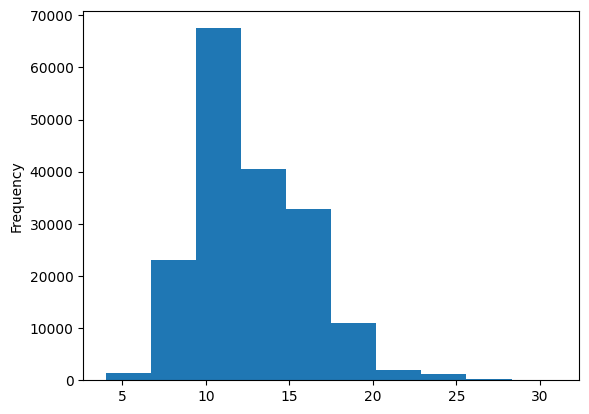

In [95]:
train_df.total_lines.plot.hist()

In [96]:
np.percentile(train_df.total_lines,95)

19.0

In [97]:
train_tot_lines_oh=tf.one_hot(train_df[['total_lines']].to_numpy(),depth=20)
val_tot_lines_oh=tf.one_hot(val_df[['total_lines']].to_numpy(),depth=20)
test_tot_lines_oh=tf.one_hot(test_df[['total_lines']].to_numpy(),depth=20)

In [104]:
tkn_inputs=layers.Input(shape=(),dtype='string',name='token_inputs')
tkn_emb = tf_hub_embedding_layer(tf.cast(tkn_inputs, dtype=tf.string))  # Explicitly cast input
tkn_outputs=layers.Dense(128,activation='relu')(tkn_emb)
tkn_mdl=tf.keras.Model(inputs=tkn_inputs,outputs=tkn_outputs,name='tkn_mdl')

ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


In [99]:
char_inputs=layers.Input(shape=(1,),dtype='string',name='char_inputs')
char_vect=char_vect(char_inputs)
char_emb=char_embed(char_vect)


In [100]:
char_bi_lstm=layers.Bidirectional(layers.LSTM(24))(char_emb)
char_model=tf.keras.Model(inputs=char_inputs,outputs=char_bi_lstm,name='char_model')

In [105]:
train_line_no_oh[0].shape

TensorShape([1, 15])

In [106]:
line_no_ip=layers.Input(shape=(15,),name='line_no_ip')
x=layers.Dense(32,activation='relu')(line_no_ip)
line_no_model=tf.keras.Model(inputs=line_no_ip,outputs=x,name='line_no_model')

In [107]:
total_lines_ip=layers.Input(shape=(20,),name='total_lines_ip')
y=layers.Dense(32,activation='relu')(total_lines_ip)
total_line_model=tf.keras.Model(inputs=total_lines_ip,outputs=y,name='total_line_model')

In [108]:
tribrid_emb=layers.Concatenate(name='char_tkn_positional_emb')([line_no_model.output,total_line_model.output])

In [109]:
op_layer=layers.Dense(5,activation='softmax')(tribrid_emb)
m5=tf.keras.Model(inputs=[char_inputs,line_no_ip,total_lines_ip],outputs=op_layer,name='m5_tribrid')

In [110]:
m5.summary()

Model: "m5_tribrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ line_no_ip (InputLayer)   │ (None, 15)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ total_lines_ip            │ (None, 20)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 32)             │            512 │ line_no_ip[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 32)             │            672 │ total_lines_ip[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ char_tkn_positional_emb   │ (None, 64)             │              0 │ dense_4[0][0],         │
│ (Concatenate)             │                        │                │ dense_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ char_inputs (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 5)              │            325 │ char_tkn_positional_e… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,509 (5.89 KB)

 Trainable params: 1,509 (5.89 KB)

 Non-trainable params: 0 (0.00 B)

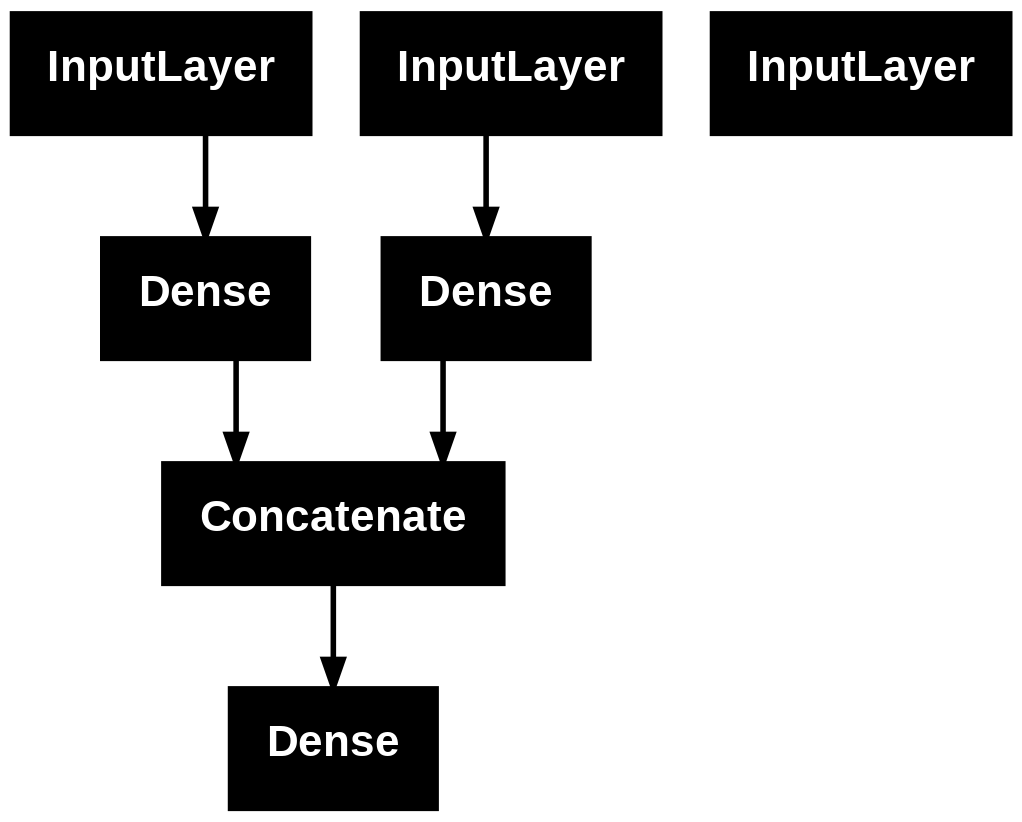

In [111]:
from tensorflow.keras.utils import plot_model
plot_model(m5)

In [113]:
m5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), #helps prevent over fitting=assigns some value from the highest prob cls to other cls prob
           optimizer=tf.keras.optimizers.Adam(),
          metrics=['accuracy'])

In [123]:
train_char_tkn_pos=tf.data.Dataset.from_tensor_slices((np.array(train_char,dtype=object)[:,None],
                                                       train_line_no_oh,
                                                       train_tot_lines_oh))
train_char_tkn_pos_labels=tf.data.Dataset.from_tensor_slices(train_labels_ohe)
train_char_tkn_pos_ds=tf.data.Dataset.zip((train_char_tkn_pos,train_char_tkn_pos_labels))
train_char_tkn_pos_ds=train_char_tkn_pos_ds.batch(32).prefetch(tf.data.AUTOTUNE)

In [124]:
val_char_tkn_pos=tf.data.Dataset.from_tensor_slices((tf.squeeze(np.array(val_char,dtype=object))[:,None],
                                                     tf.squeeze(  val_line_no_oh),
                                                      tf.squeeze( val_tot_lines_oh))).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_tkn_pos_labels=tf.data.Dataset.from_tensor_slices(val_labels_ohe).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_tkn_pos_ds=tf.data.Dataset.zip((val_char_tkn_pos,val_char_tkn_pos_labels))
val_char_tkn_pos_ds=val_char_tkn_pos_ds.batch(32).prefetch(tf.data.AUTOTUNE)

In [125]:
train_char_tkn_pos_ds,val_char_tkn_pos_ds

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 1), dtype=tf.string, name=None), TensorSpec(shape=(None, 1, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 20), dtype=tf.float32, name=None)), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, None, 1), dtype=tf.string, name=None), TensorSpec(shape=(None, None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, None, 20), dtype=tf.float32, name=None)), TensorSpec(shape=(None, None), dtype=tf.float32, name=None))>)

In [126]:
m5_hist=m5.fit(train_char_tkn_pos_ds,epochs=3,validation_data=val_char_tkn_pos_ds)

Epoch 1/3


ValueError: Input 1 of layer "m5_tribrid" is incompatible with the layer: expected shape=(None, 15), found shape=(None, 1, 15)